# Recognition tenis'ball with MXNet and GluonCV

In [1]:
# Install MXNet
!pip install -q mxnet gluoncv

In [3]:
# Imports
import os 
import numpy as np 
import mxnet as mx 
import gluoncv as gcv 
import matplotlib 
import matplotlib.pyplot as plt 
from pathlib import Path 
from mxnet.gluon.data.vision import transforms

In [4]:
# Versions packages
%reload_ext watermark
%watermark -a "Data'snow" --iversions

gluoncv    0.8.0
mxnet      1.7.0
autopep8   1.4.4
numpy      1.18.1
json       2.0.9
matplotlib 3.1.3
Data'snow


In [5]:
# Defining dir of images
M3_DATA = Path(os.getenv('DATA_DIR', 'dados'))
M3_IMAGES = Path(os.getenv('DATA_DIR', 'imagens'))
M3_MODELS = Path(os.getenv('DATA_DIR', 'modelos'))

In [7]:
# Function to load one image
def carrega_imagem(filepath):
    return mx.image.imread(filepath)
    raise NotImplementedError()

In [10]:
# Defining path of image
arquivo_imagem = Path(M3_IMAGES, 'imagem1.jpg')

In [11]:
# Loading image
imagem_test = carrega_imagem(arquivo_imagem)

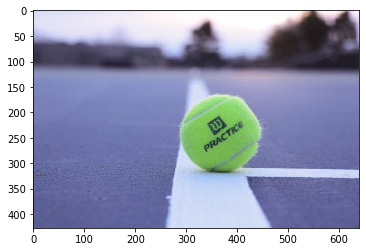

In [13]:
# Plot image
plt.imshow(imagem_test.asnumpy())

In [18]:
# Function to transform image to apply in model
def transforma_imagem(array):
    imagem_transformada = transforms.Compose([transforms.Resize(224, keep_ratio=True),
                                             transforms.CenterCrop((224,224)),
                                             transforms.ToTensor(),
                                              transforms.Normalize([.485, .456, .606], [.229, .224, .225])
                                             ])
    return (imagem_transformada(array).expand_dims(0))

In [19]:
# Transforming image
saida_imagem_transformada = transforma_imagem(imagem_test)

In [21]:
print(saida_imagem_transformada)


[[[[ 1.7009162   1.7009162   1.7009162  ...  2.2489083   2.2317834
     2.1632845 ]
   [ 1.7180408   1.7180408   1.7180408  ...  2.2489083   2.1632845
     2.0262864 ]
   [ 1.7522904   1.7522904   1.7522904  ...  2.2146587   2.0947855
     1.923538  ]
   ...
   [-0.49105233 -0.49105233 -0.49105233 ... -0.45680285 -0.43967807
    -0.42255333]
   [-0.5081771  -0.49105233 -0.49105233 ... -0.43967807 -0.42255333
    -0.42255333]
   [-0.5081771  -0.49105233 -0.49105233 ... -0.43967807 -0.42255333
    -0.42255333]]

  [[ 1.9208683   1.9208683   1.9208683  ...  2.2009804   2.0434172
     1.8683473 ]
   [ 1.9383754   1.9383754   1.9383754  ...  2.0434172   1.8508403
     1.6757703 ]
   [ 1.9733893   1.9733893   1.9733893  ...  1.8683473   1.6582633
     1.4656863 ]
   ...
   [-0.35504198 -0.35504198 -0.35504198 ... -0.32002798 -0.30252096
    -0.28501397]
   [-0.37254897 -0.35504198 -0.35504198 ... -0.30252096 -0.28501397
    -0.28501397]
   [-0.37254897 -0.35504198 -0.35504198 ... -0.3025209

In [22]:
# Function to load a pre-trained model
def carrega_modelo_pre_treinado():
    return gcv.model_zoo.mobilenet1_0(root=M3_MODELS, pretrained=True)

In [23]:
# Loading model
modelo = carrega_modelo_pre_treinado()

9624KB [00:01, 7000.28KB/s]                          


In [24]:
# Getting the weights from model 
params = modelo.collect_params(select=modelo.name + '_conv0_weight')

In [25]:
params

mobilenet0_ (
  Parameter mobilenet0_conv0_weight (shape=(32, 3, 3, 3), dtype=<class 'numpy.float32'>)
)

In [26]:
# function to predict probability
def preve_proba(modelo, data):
    direct_output = modelo(data)[0]
    return mx.nd.softmax(direct_output)

In [28]:
# Creating Class with completed model
class ClassificationTenisBall():
    def __init__(self):
        self._network = carrega_modelo_pre_treinado()
        
    def classify(self, filepath):
        transformed_image = transforma_imagem(carrega_imagem(filepath))
        self._visualize(transformed_image)
        pred_proba = preve_proba(self._network, transformed_image)[852].asscalar()
        print('{0:.2%} de confiança que esta imagem é de uma bola de tênis.'.format(pred_proba))
        return pred_proba
    
    def _visualize(self, transformed_image):
        chw_image = transformed_image[0].transpose((1,2,0))
        chw_image = ((chw_image * 64) + 128).clip(0, 255).astype('uint8')
        plt.imshow(chw_image.asnumpy())

In [29]:
# Create classifier
modelo_clf = ClassificationTenisBall()

99.18% de confiança que esta imagem é de uma bola de tênis.


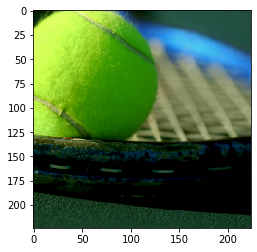

In [30]:
# Classifying images
imagem1 = Path(M3_IMAGES, 'imagem2.jpg')
pred_proba = modelo_clf.classify(imagem1)

99.66% de confiança que esta imagem é de uma bola de tênis.


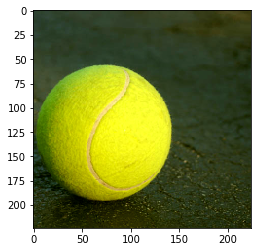

In [31]:
# Classifica uma imagem
imagem2 = Path(M3_IMAGES, 'imagem3.jpg')
pred_proba = modelo_clf.classify(imagem2)

0.01% de confiança que esta imagem é de uma bola de tênis.


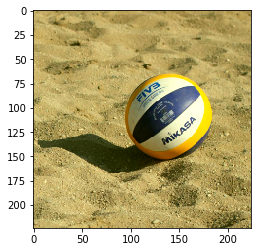

In [32]:
# Classifica uma imagem
imagem3 = Path(M3_IMAGES, 'imagem4.jpg')
pred_proba = modelo_clf.classify(imagem3)

98.95% de confiança que esta imagem é de uma bola de tênis.


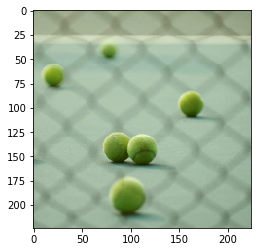

In [33]:
# Classifica uma imagem
imagem3 = Path(M3_IMAGES, 'imagem5.jpg')
pred_proba = modelo_clf.classify(imagem3)

0.04% de confiança que esta imagem é de uma bola de tênis.


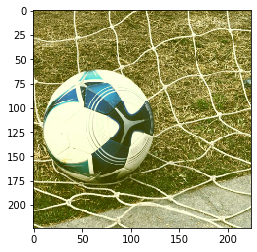

In [34]:
# Classifica uma imagem
imagem3 = Path(M3_IMAGES, 'imagem6.jpg')
pred_proba = modelo_clf.classify(imagem3)